In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def line_creator(a, b):
    return lambda x: a*x + b
    


In [3]:
df = pd.read_csv('methanol-water.csv')
df

,x,y
0,0.02,0.013
1,0.06,0.300
2,0.10,0.420
3,0.20,0.570
4,0.30,0.660
5,0.40,0.720
6,0.50,0.780
7,0.60,0.820
8,0.70,0.870
9,0.80,0.910


In [4]:
x = df['x'].values
y = df['y'].values

In [5]:
y

array([0.013, 0.3  , 0.42 , 0.57 , 0.66 , 0.72 , 0.78 , 0.82 , 0.87 ,
       0.91 , 0.95 , 0.98 ])

In [6]:
def create_feed_line(q, xf):
    return lambda x: q*x/(q-1) - xf/(q-1)

In [13]:
feed = create_feed_line(0.5, 0.5)
x0f = np.linspace(0,1,200)
y0f = [feed(x) for x in np.linspace(0,1,200)]

In [9]:

def find_intersection(a, b):
    if a + 1 == b:
        return a, b

    m = (a+b)//2
    signal_change = (y_values[m]-feed(x_values[m]))*(y_values[a]-feed(x_values[a]))
    if signal_change < 0:
        b = m
    else:
        a = m
        
    return find_intersection(a,b)    

In [10]:
x_values = x
y_values = y
a = 0
b = len(x)-1
feed = create_feed_line(0.5, 0.5)
a, b = find_intersection(a,b)
print(a,b)

4 5


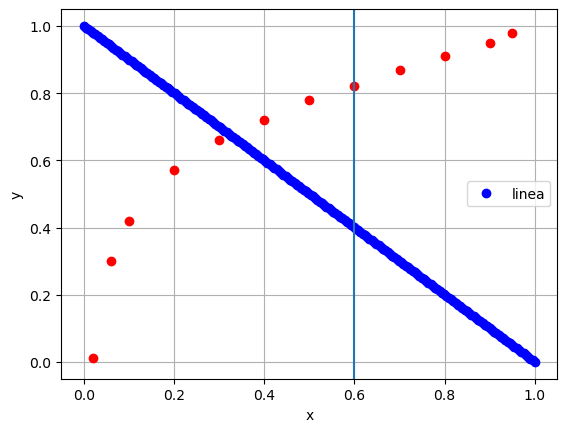

In [20]:
plt.plot(x, y, 'ro')
plt.plot(x0f, y0f, 'bo', label = 'linea')
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x[7])

plt.legend()
plt.grid(True)